In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime

from matplotlib import pyplot as plt
from matplotlib import image as img
from matplotlib.offsetbox import AnchoredText
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.plotting import plot_lifetimes

from sklearn.model_selection import train_test_split

from lifelines.statistics import multivariate_logrank_test

plt.rcParams.update({"xtick.labelsize": 8,
                     "ytick.labelsize": 8,
                     "axes.titlesize": 10
                    })

In [25]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv', sep=',')

In [26]:
df.shape

(299, 13)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [28]:
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
185,60.667,1,104,1,30,0,389000.00,1.5,136,1,0,171,1
29,82.000,0,70,1,30,0,200000.00,1.2,132,1,1,26,1
106,55.000,0,748,0,45,0,263000.00,1.3,137,1,0,88,0
78,75.000,1,203,1,38,1,283000.00,0.6,131,1,1,74,0
215,73.000,0,582,0,35,1,203000.00,1.3,134,1,0,195,0
190,80.000,0,582,1,35,0,350000.00,2.1,134,1,0,174,0
52,60.000,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
49,57.000,1,129,0,30,0,395000.00,1.0,140,0,0,42,1
2,65.000,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
233,53.000,1,707,0,38,0,330000.00,1.4,137,1,1,209,0


In [29]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


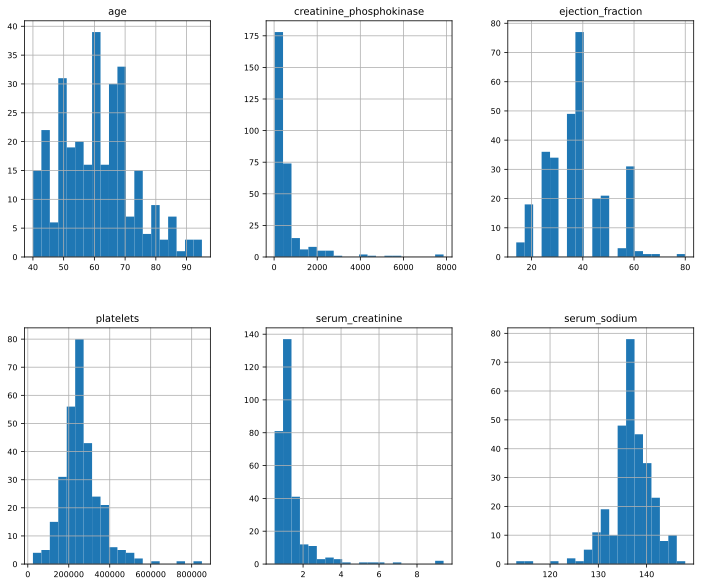

In [30]:
df_num_features = df.drop(columns=['anaemia', 'diabetes', 'high_blood_pressure', 
                                         'sex', 'smoking', 'DEATH_EVENT', 'time'])
df_num_features.hist(figsize=(12, 10), bins=20, grid=True, layout=(-1, 3));

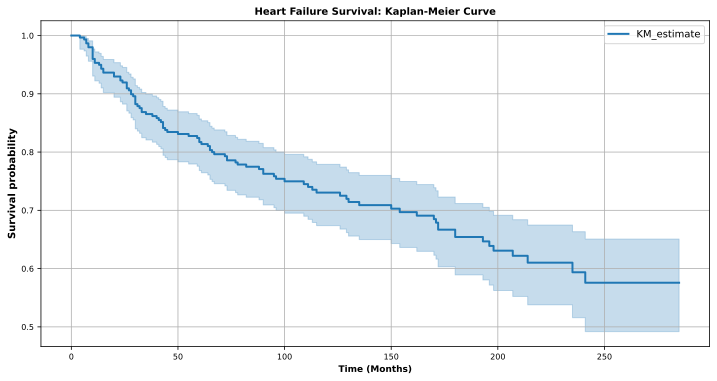

In [31]:
kmf = KaplanMeierFitter()
kmf.fit(df['time'], df['DEATH_EVENT'])
kmf.plot(linewidth=2, figsize=(12, 6))
plt.title('Heart Failure Survival: Kaplan-Meier Curve', fontsize=10, fontweight='bold')
plt.xlabel('Time (Months)', fontsize=9, fontweight='bold')
plt.ylabel('Survival probability', fontsize=10, fontweight='bold')
plt.grid()

plt.show()

In [32]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
4.0,0.996656
6.0,0.993311
7.0,0.986622
8.0,0.979933
...,...
270.0,0.575705
271.0,0.575705
278.0,0.575705


In [33]:
feature_names = df.drop(df_num_features, axis=1)
feature_names_cat = feature_names.drop(['DEATH_EVENT', 'time'], axis=1).columns.tolist()
feature_names_cat

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

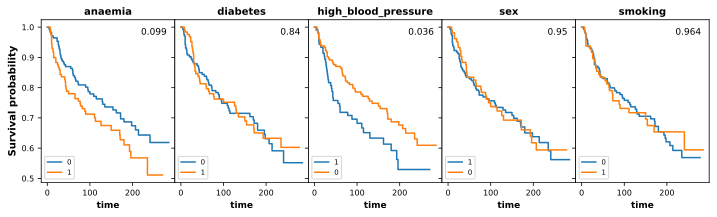

In [34]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, 
                         sharex = True, sharey = True,
                         figsize=(12, 3)
                        )

def categorical_km_curves(feature, t='time', event='DEATH_EVENT', df=feature_names, ax=None):
    for cat in (df[feature].unique()):
        idx = df[feature] == cat
        kmf = KaplanMeierFitter()
        kmf.fit(df[idx][t], event_observed=df[idx][event], label=cat)
        kmf.plot(ax=ax, label=cat, ci_show=False)

for cat, ax in zip(feature_names_cat, axes.flatten()):
    categorical_km_curves(feature=cat, t='time', event='DEATH_EVENT', df = feature_names, ax=ax)
    ax.legend(loc='lower left', prop=dict(size=7))
    ax.set_title(cat, pad=5, fontsize=10, fontweight='bold')
    p = multivariate_logrank_test(feature_names['time'], feature_names[cat], feature_names['DEATH_EVENT'])
    ax.add_artist(AnchoredText(p.p_value.round(3), frameon=False, 
                               loc='upper right', prop=dict(size=9)))
    ax.set_xlabel('time', fontsize = 9, fontweight='bold')
    ax.set_ylabel('Survival probability', fontsize = 10, fontweight='bold')
    
fig.subplots_adjust(wspace = 0)

plt.show()

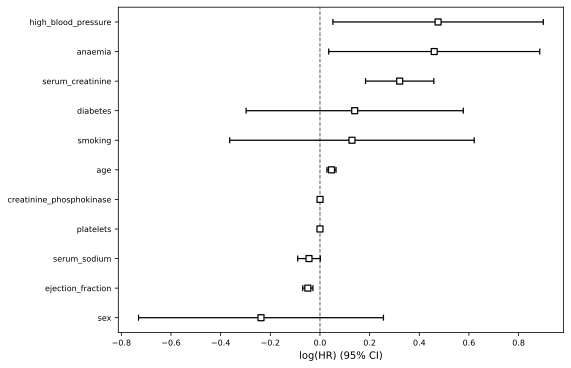

In [35]:
cph = CoxPHFitter()
cph.fit(df, duration_col='time', event_col='DEATH_EVENT')

plt.figure(figsize=(8, 6))
cph.plot()
plt.show()

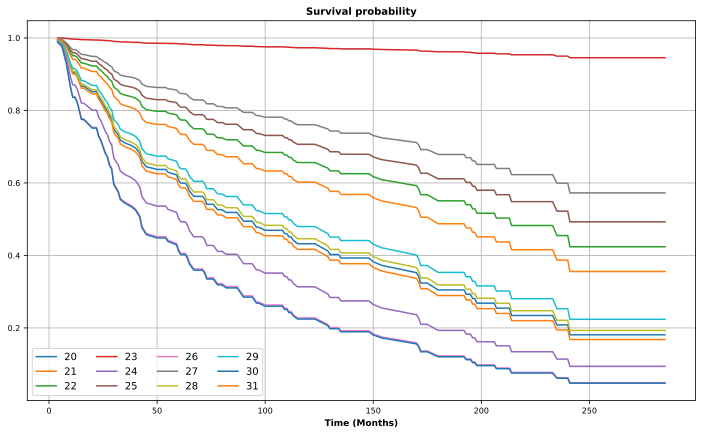

In [36]:
survival_func_plot = cph.predict_survival_function(df)

plt.figure(figsize=(12, 7))
plt.plot(survival_func_plot.loc[:, 20:31])
plt.legend(labels=survival_func_plot.loc[:, 20:].columns, loc ="lower left", ncol=4)

plt.grid()
plt.xlabel('Time (Months)', fontsize=9, fontweight='bold')
plt.title('Survival probability', fontsize=10, fontweight='bold')
plt.show()

In [37]:
for_prognosis = survival_func_plot.T

In [38]:
for_prognosis.loc[20:31][250].round(2)

20    0.18
21    0.17
22    0.42
23    0.95
24    0.09
25    0.49
26    0.05
27    0.57
28    0.19
29    0.22
30    0.05
31    0.36
Name: 250.0, dtype: float64